<a href="https://colab.research.google.com/github/rubanzasilva/ps-s03e02/blob/main/ps_s03e02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.9 MB/s eta 0:00:00


In [9]:
from fastai.tabular.all import *
import sweetviz as sv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/Rubanza/datasets/playground-series-s3e2/

sample_submission.csv  test.csv  train.csv


In [4]:
path = Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2/')
path

Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2')

In [5]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample_df = pd.read_csv(path/'sample_submission.csv')
train_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [10]:
report = sv.analyze(train_df)

                                             |          | [  0%]   00:00 -> (? left)

In [11]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


EDA

Missing Values

In [20]:
train_df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
log_avg_glucose_level    0
dtype: int64

Take a look at the dataframe

In [13]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


<Axes: >

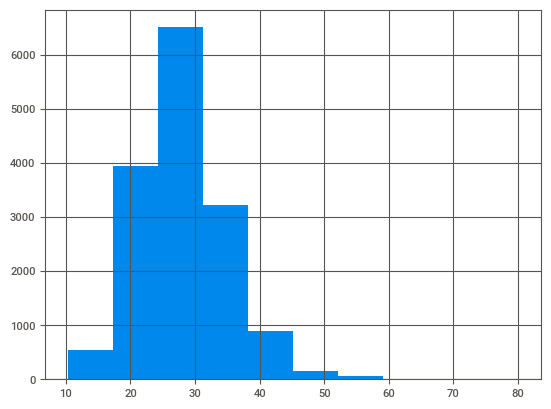

In [15]:
train_df['bmi'].hist()

<Axes: >

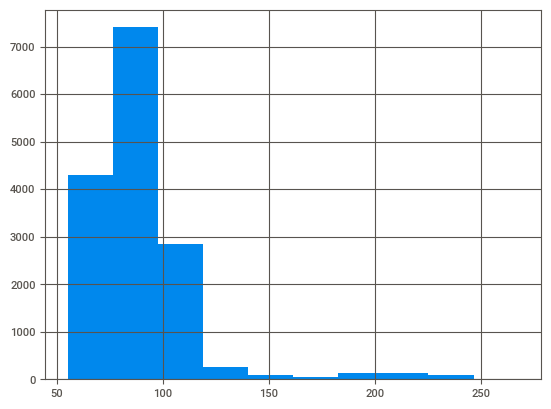

In [17]:
train_df['avg_glucose_level'].hist()

<Axes: >

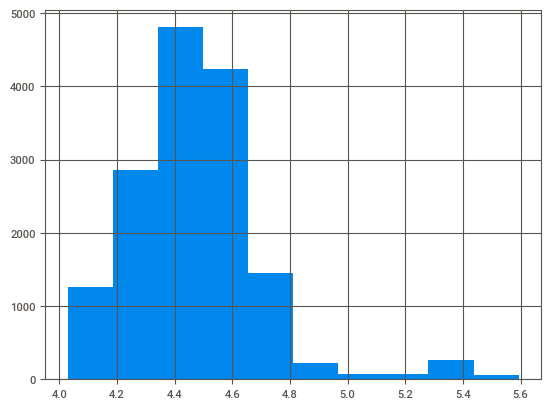

In [19]:
train_df['log_avg_glucose_level'] = np.log(train_df['avg_glucose_level'] + 1)
train_df['log_avg_glucose_level'].hist()

In [14]:
train_df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [6]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="stroke",
    cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
    procs = [Categorify, FillMissing, Normalize])

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [ ]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
                   y_names='stroke',
                   splits=splits)

In [ ]:
to.xs.iloc[:2]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi
4120,1,1,1,1,3,1,1,-0.792525,-0.488059,-1.251150,-1.002203
8944,1,1,1,2,3,1,1,0.292607,1.290013,-0.733142,-0.582832


In [ ]:
dls = to.dataloaders(bs=64)

In [ ]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

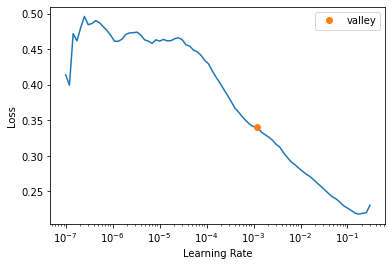

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.061738,0.045913,0.957190,00:02
1,0.041604,0.045773,0.957190,00:02
2,0.042714,0.045116,0.957190,00:02
3,0.042195,0.041735,0.957190,00:02
4,0.041865,0.037984,0.957190,00:02
5,0.037436,0.042812,0.957190,00:02
6,0.036711,0.037619,0.957190,00:02
7,0.035268,0.037639,0.957190,00:02
8,0.038655,0.036803,0.957190,00:02
9,0.035025,0.037965,0.957190,00:02


In [ ]:
dl = learn.dls.test_dl(test_df)

In [ ]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[ 0.0444],
         [ 0.2073],
         [-0.0151],
         ...,
         [-0.0525],
         [ 0.0185],
         [-0.0356]]), None)

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rubanzasilva","key":"069494dac9599dfa6ad2faeffa757e38"}'}

In [ ]:

 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
#!kaggle datasets list

In [ ]:
target_preds = preds[0]

In [ ]:
test_df['stroke'] = target_preds

test_df.to_csv('submission.csv', columns=['id','stroke'], index=False)

sub = pd.read_csv('submission.csv')
sub.head()

,id,stroke
0,15304,0.044416
1,15305,0.207278
2,15306,-0.015053
3,15307,0.066668
4,15308,0.010570


In [ ]:
!kaggle competitions submit -c playground-series-s3e2 -f submission.csv -m "fastai baseline"

100% 181k/181k [00:00<00:00, 767kB/s]
Successfully submitted to Playground Series Season 3, Episode 2